# <center> Heart Attack Analysis & Prediction</center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Heart_diagram-en.svg/762px-Heart_diagram-en.svg.png" height="500" width="500">

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv("heart_duplicate_removed.csv")
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# about Dataset
- Age : Age of the patient
- Sex : Sex of the patient
- exang: exercise induced angina (1 = yes; 0 = no)
    - angina - A type of chest pain caused by reduced blood flow to the heart.
- caa: number of major vessels (0-3)
    -  aorta, the superior vena cava, the inferior vena cava, the pulmonary artery
- cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
- trestbps : resting blood pressure (in mm Hg)
- chol : cholestoral in mg/dl fetched via BMI sensor
- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- rest_ecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
- thalach : maximum heart rate achieved
- slope: the slope of the peak exercise ST segment
  - Value 1: upsloping
  - Value 2: flat
  - Value 3: downsloping
- thal: A blood disorder called thalassemia
  - 3 = normal
  - 6 = fixed defect
  - 7 = reversable defect
- target : 0= less chance of heart attack 1= more chance of heart attack

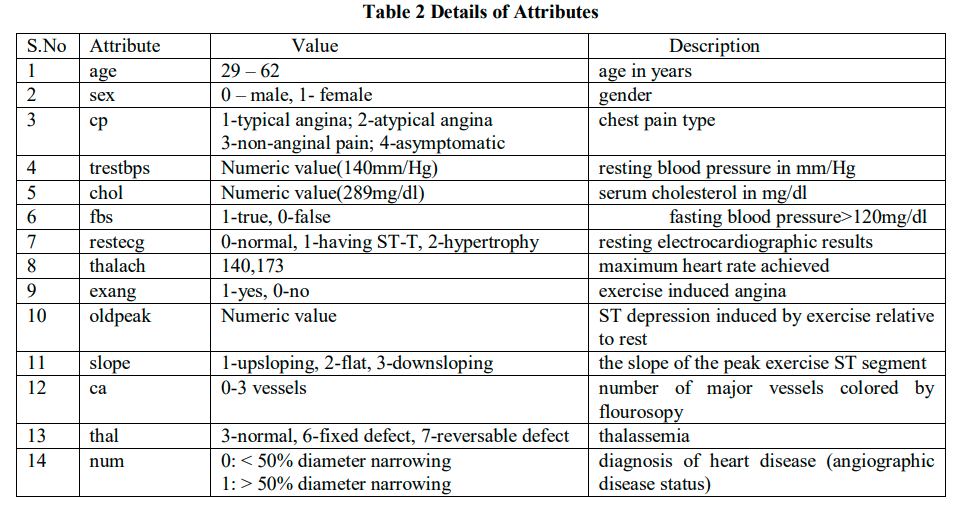

## find more details about the dataset here ---> https://archive.ics.uci.edu/ml/datasets/heart%2BDisease

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [33]:
df[df.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [34]:
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

In [35]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [36]:
df2 = df

In [125]:
#df.rename(columns={'thalachh':'max_hrate','caa':'vessel','thall':''})

<AxesSubplot:>

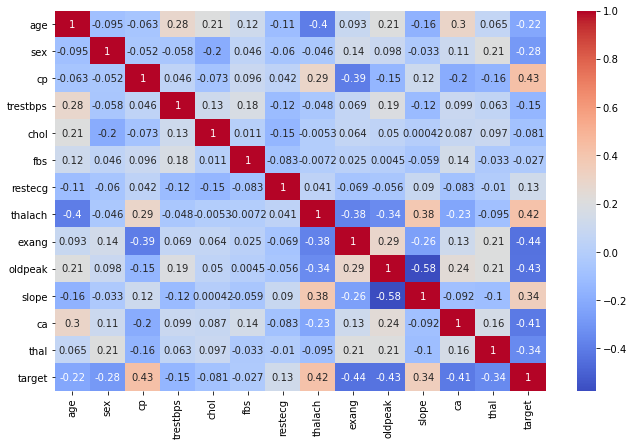

In [37]:
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

sex  target
0    1          72
     0          24
1    0         114
     1          92
Name: target, dtype: int64

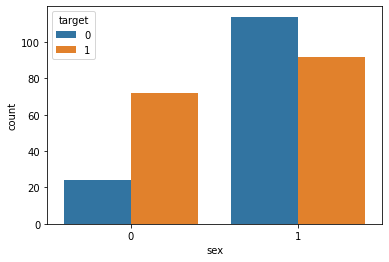

In [39]:
sns.countplot(data=df, x='sex', hue='target')

df.groupby('sex').target.value_counts()

cp  target
0   0         104
    1          39
1   1          41
    0           9
2   1          68
    0          18
3   1          16
    0           7
Name: target, dtype: int64

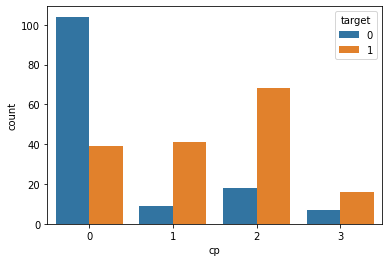

In [40]:
sns.countplot(data=df, x='cp', hue='target')

df.groupby('cp').target.value_counts()

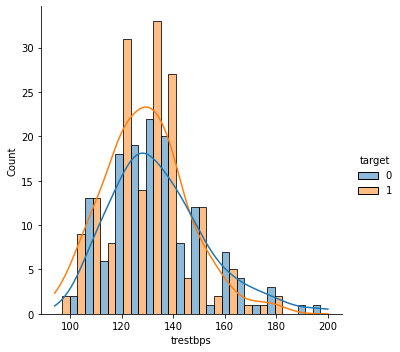

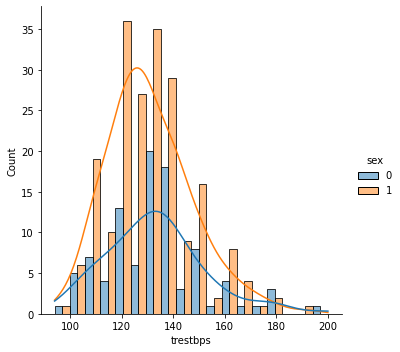

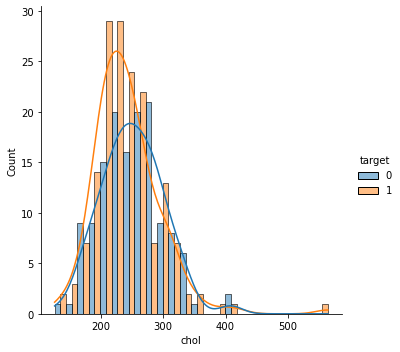

In [41]:
sns.displot(data=df, x='trestbps', hue='target', kde=True, multiple='dodge')

sns.displot(data=df, x='trestbps', hue='sex', kde=True, multiple='dodge')

sns.displot(data=df, x='chol', hue='target', kde=True, multiple='dodge')

<AxesSubplot:xlabel='thal', ylabel='count'>

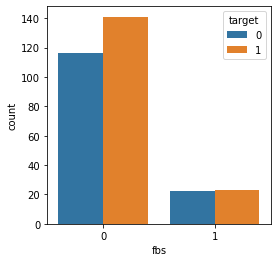

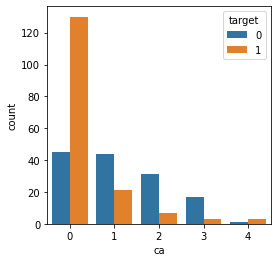

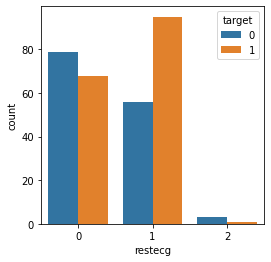

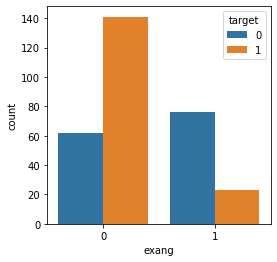

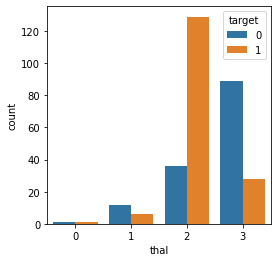

In [47]:
plt.subplots(figsize = (4,4))
sns.countplot(data=df, x='fbs', hue='target')

plt.subplots(figsize = (4,4))
sns.countplot(data=df, x='ca', hue='target')

plt.subplots(figsize = (4,4))
sns.countplot(data=df, x='restecg', hue='target')

plt.subplots(figsize = (4,4))
sns.countplot(data=df, x='exang', hue='target')

plt.subplots(figsize = (4,4))
sns.countplot(data=df, x='thal', hue='target')


In [140]:
# col_index = list(range(0,4))+[-1]
# sns.pairplot(df.iloc[:,col_index], hue='output', height=3, aspect=1)

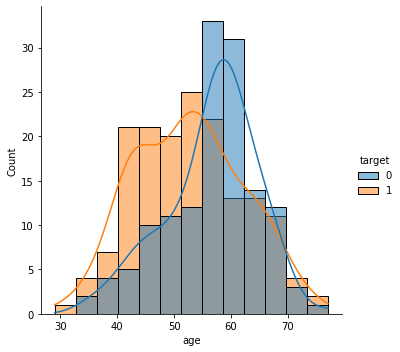

In [44]:
sns.displot(data=df, x='age',hue='target', kde=True)

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
X = MinMaxScaler().fit_transform(df.drop(columns='target'))
X1 = StandardScaler().fit_transform(df.drop(columns='target'))

xtrn,xtest,ytrn,ytest = train_test_split(X, df.target, test_size=0.2)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

<AxesSubplot:>

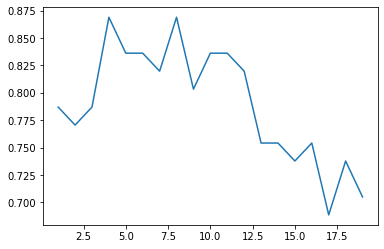

In [52]:
accuracy = list()
for k in range(1,20):
    model = KNeighborsClassifier(n_neighbors=k).fit(xtrn,ytrn)
    accuracy.append(accuracy_score(ytest,model.predict(xtest)))

sns.lineplot(x=range(1,20), y=accuracy)

In [54]:
score=[]
for x in range(1,11):
    xtrn,xtest,ytrn,ytest = train_test_split(X, df.target, test_size=0.2)
    algos = [LogisticRegression(),KNeighborsClassifier(n_neighbors=5),SVC(),
             DecisionTreeClassifier(), RandomForestClassifier()]

    accuracy=[]
    for algo in algos:
        model = algo.fit(xtrn,ytrn)
        accuracy.append(accuracy_score(ytest, model.predict(xtest)))
    score.append(accuracy)

algo_name = ['LR','KNN','SVM','DT','RF']
ans = pd.DataFrame(score,columns=algo_name)
ans

,LR,KNN,SVM,DT,RF
0,0.868852,0.868852,0.836066,0.819672,0.852459
1,0.852459,0.868852,0.885246,0.803279,0.852459
2,0.885246,0.836066,0.901639,0.803279,0.868852
3,0.852459,0.737705,0.786885,0.737705,0.721311
4,0.819672,0.803279,0.803279,0.754098,0.803279
5,0.770492,0.836066,0.803279,0.803279,0.819672
6,0.852459,0.819672,0.852459,0.721311,0.819672
7,0.786885,0.721311,0.754098,0.721311,0.754098
8,0.852459,0.786885,0.868852,0.770492,0.885246
9,0.819672,0.786885,0.819672,0.754098,0.819672


In [55]:
ans.mean()

LR     0.836066
KNN    0.806557
SVM    0.831148
DT     0.768852
RF     0.819672
dtype: float64

<AxesSubplot:>

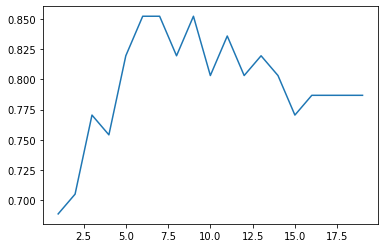

In [57]:
xtrn,xtest,ytrn,ytest = train_test_split(X1, df.target, test_size=0.2)
accuracy = list()
for k in range(1,20):
    model = KNeighborsClassifier(n_neighbors=k).fit(xtrn,ytrn)
    accuracy.append(accuracy_score(ytest,model.predict(xtest)))

sns.lineplot(x=range(1,20), y=accuracy)

In [59]:
score=[]
for x in range(1,11):
    xtrn,xtest,ytrn,ytest = train_test_split(X1, df.target, test_size=0.2)
    algos = [LogisticRegression(),KNeighborsClassifier(n_neighbors=8),SVC(),
             DecisionTreeClassifier(), RandomForestClassifier()]

    accuracy=[]
    for algo in algos:
        model = algo.fit(xtrn,ytrn)
        accuracy.append(accuracy_score(ytest, model.predict(xtest)))
    score.append(accuracy)

algo_name = ['LR','KNN','SVM','DT','RF']
ans2 = pd.DataFrame(score,columns=algo_name)
ans2

,LR,KNN,SVM,DT,RF
0,0.885246,0.852459,0.819672,0.704918,0.868852
1,0.836066,0.688525,0.721311,0.737705,0.737705
2,0.852459,0.918033,0.868852,0.770492,0.868852
3,0.819672,0.836066,0.885246,0.852459,0.852459
4,0.885246,0.819672,0.868852,0.868852,0.885246
5,0.754098,0.803279,0.770492,0.672131,0.819672
6,0.754098,0.737705,0.819672,0.770492,0.836066
7,0.819672,0.836066,0.819672,0.803279,0.852459
8,0.770492,0.819672,0.786885,0.770492,0.836066
9,0.868852,0.803279,0.852459,0.770492,0.836066


In [60]:
ans2.mean()

LR     0.824590
KNN    0.811475
SVM    0.821311
DT     0.772131
RF     0.839344
dtype: float64

In [61]:
df2 = pd.concat([ans.mean(),ans2.mean()], axis=1)
df2.rename(columns={0:'Std_Scaler', 1:'MinMax_Scaler'}, inplace=True)
df2

,Std_Scaler,MinMax_Scaler
LR,0.836066,0.824590
KNN,0.806557,0.811475
SVM,0.831148,0.821311
DT,0.768852,0.772131
RF,0.819672,0.839344


### Find a beautiful & professional solution on this dataset here 👇https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7